### Anirudh Sriram
### 21BAI1239

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df=df.drop('CustomerID',axis=1)

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Data-Preprocessing

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Data-Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

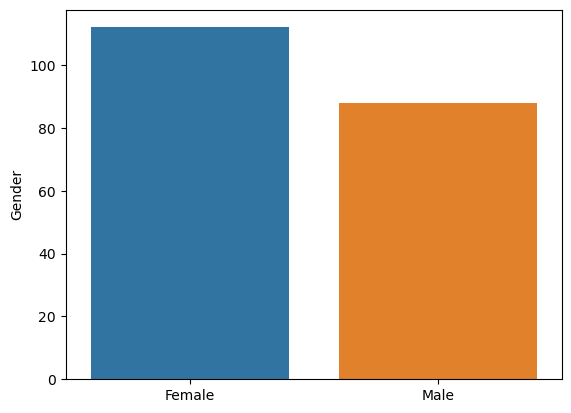

In [10]:
sns.barplot(x=df['Gender'].value_counts().index,y=df['Gender'].value_counts());

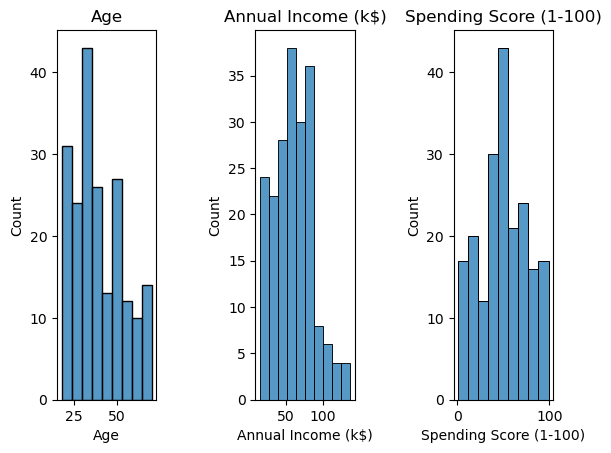

In [11]:
k=1
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    plt.subplot(1,3,k)
    sns.histplot(df[i])
    plt.subplots_adjust(hspace =10 , wspace = 1)
    plt.title(i)
    k+=1
plt.show()

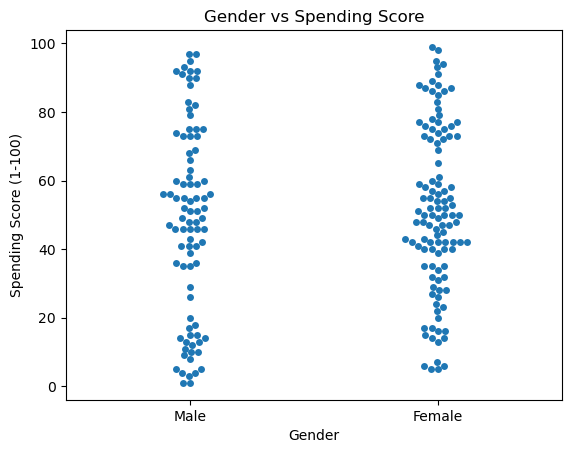

In [12]:
sns.swarmplot(x=df['Gender'],y=df['Spending Score (1-100)'])
plt.title('Gender vs Spending Score');

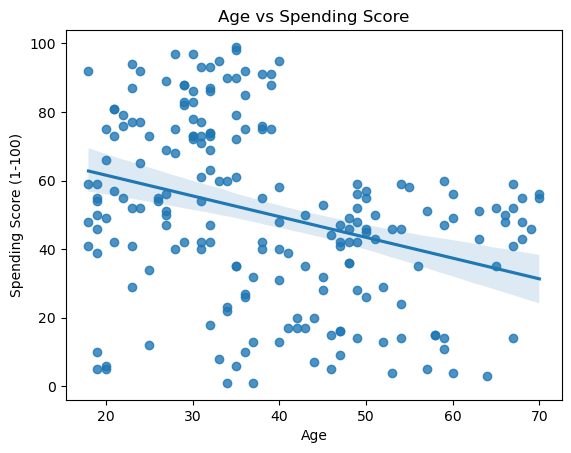

In [13]:
sns.regplot(x=df['Age'],y=df['Spending Score (1-100)'])
plt.title('Age vs Spending Score');

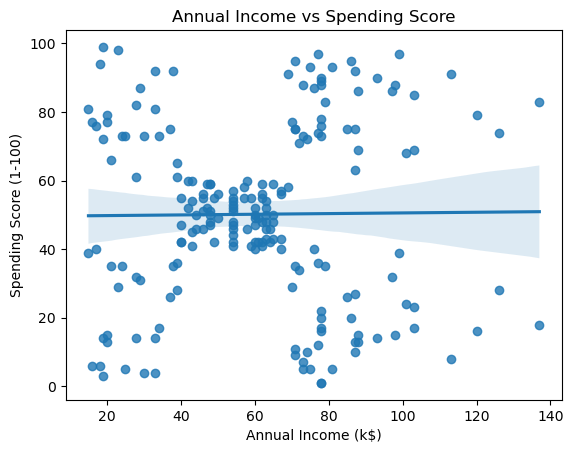

In [14]:
sns.regplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score');

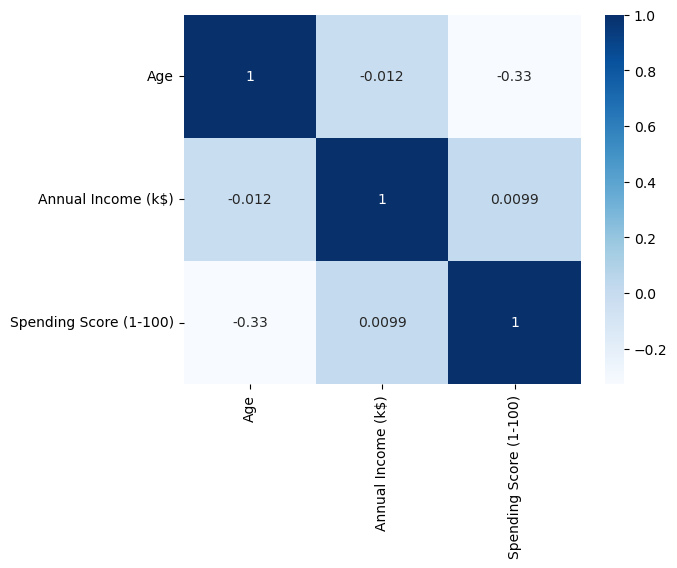

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

### Clustering Model

In [16]:
from sklearn.cluster import KMeans

In [17]:
data=df[['Age','Spending Score (1-100)']]
data.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


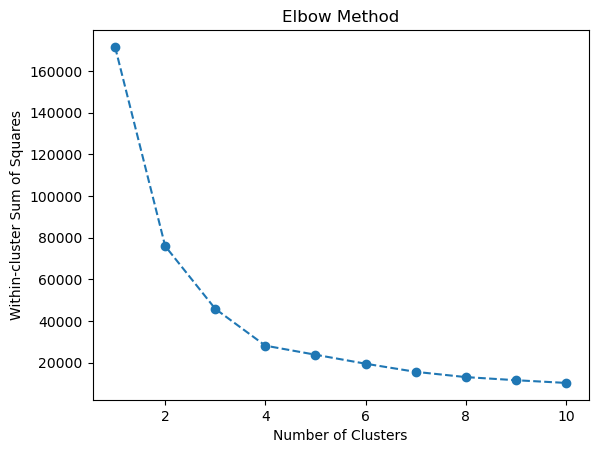

In [18]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
pred=kmeans.fit_predict(data)

In [20]:
pred

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [21]:
df['Preds']=pred

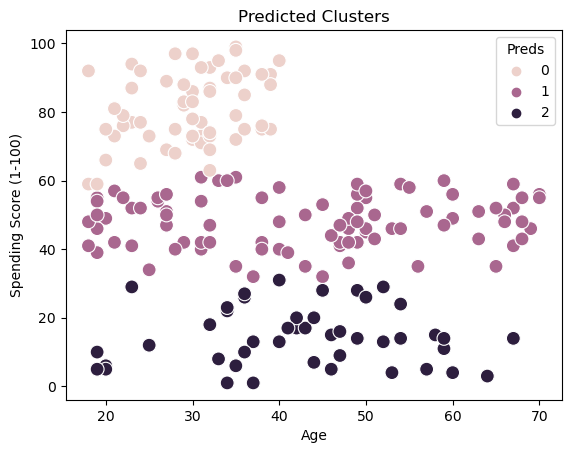

In [22]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Preds', data=df, s=100)
plt.title('Predicted Clusters')
plt.show()